In [7]:
#importing required libraries  
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Loading the dataset
df=pd.read_csv('/content/data_cancer.csv')

In [11]:
#Removing id column from the data
df = df.drop(df.columns[[0]], axis=1)

In [12]:
#Statistical summary of the data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
568,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.015570,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
569,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.016640,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
570,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
571,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.04310,0.07845,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
572,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955,0.2656,1.974,1.954,17.49,0.006538,0.01395,0.01376,0.009924,0.03416,0.002928,12.360,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994


In [14]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,550.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,556.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,14.134501,19.319197,92.020960,655.525480,0.096337,0.104353,0.088939,0.048979,0.181252,0.062678,0.405418,1.217765,2.871603,40.375791,0.007030,0.025441,0.031897,0.011811,0.020468,0.003792,16.277869,25.713473,107.348377,881.335428,0.132327,0.254133,0.272515,0.114781,0.290213,0.083913
std,3.525210,4.306327,24.322641,352.056663,0.014044,0.052940,0.080098,0.038917,0.027369,0.006851,0.277511,0.550800,2.030868,45.471545,0.002996,0.017886,0.030163,0.006182,0.007713,0.002641,4.830813,6.147008,33.640439,568.996185,0.022806,0.157156,0.208787,0.065803,0.061720,0.018029
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.180000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020360,0.162000,0.057725,0.232400,0.835500,1.612000,17.850000,0.005158,0.012950,0.015090,0.007638,0.015220,0.002248,13.010000,21.100000,84.110000,515.300000,0.116600,0.146000,0.114500,0.064930,0.250500,0.071270
50%,13.380000,18.890000,86.340000,551.700000,0.095860,0.092420,0.061260,0.033410,0.179300,0.061455,0.323700,1.108000,2.284000,24.530000,0.006380,0.020420,0.025860,0.010930,0.018780,0.003136,14.970000,25.450000,97.670000,686.600000,0.131300,0.211900,0.226700,0.100100,0.282300,0.079990
75%,15.780000,21.820000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066075,0.478900,1.474000,3.357000,45.190000,0.008124,0.032450,0.042050,0.014710,0.023482,0.004558,18.790000,29.870000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.318400,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                573 non-null    object 
 1   radius_mean              573 non-null    float64
 2   texture_mean             573 non-null    float64
 3   perimeter_mean           573 non-null    float64
 4   area_mean                573 non-null    float64
 5   smoothness_mean          573 non-null    float64
 6   compactness_mean         573 non-null    float64
 7   concavity_mean           573 non-null    float64
 8   concave points_mean      573 non-null    float64
 9   symmetry_mean            573 non-null    float64
 10  fractal_dimension_mean   550 non-null    float64
 11  radius_se                573 non-null    float64
 12  texture_se               573 non-null    float64
 13  perimeter_se             573 non-null    float64
 14  area_se                  5

In [16]:
df.shape


(573, 31)

**Clean the data**

In [17]:
#removing duplicates
df=df.drop_duplicates()

In [18]:
#removing missing values
df = df.dropna()

In [19]:
df.shape

(529, 31)

In [20]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.306488,0.998177,0.988920,0.170664,0.528246,0.709515,0.834303,0.145567,-0.314323,0.701095,-0.104478,0.692143,0.765638,-0.224204,0.224533,0.258695,0.417292,-0.130685,-0.022025,0.968855,0.281644,0.965426,0.943509,0.114532,0.426424,0.549153,0.757228,0.159684,0.016745
texture_mean,0.306488,1.000000,0.310737,0.304906,-0.037085,0.219214,0.290921,0.276166,0.058661,-0.082912,0.277368,0.389598,0.280194,0.257374,0.013771,0.193876,0.176046,0.173298,0.012521,0.071312,0.338698,0.909933,0.341286,0.331973,0.061845,0.252936,0.278352,0.279084,0.090497,0.103066
perimeter_mean,0.998177,0.310737,1.000000,0.988042,0.204789,0.574496,0.744976,0.860076,0.176114,-0.268317,0.711634,-0.096607,0.708205,0.772481,-0.206726,0.266682,0.291957,0.445331,-0.111830,0.014985,0.968741,0.286103,0.969921,0.943591,0.143416,0.465653,0.582758,0.781566,0.181855,0.058135
area_mean,0.988920,0.304906,0.988042,1.000000,0.176790,0.521213,0.716885,0.836418,0.148612,-0.286750,0.747918,-0.072883,0.738063,0.817238,-0.169628,0.229168,0.267291,0.407904,-0.093033,-0.001788,0.962028,0.274705,0.958942,0.957290,0.119362,0.404435,0.534181,0.736056,0.142088,0.014108
smoothness_mean,0.170664,-0.037085,0.204789,0.176790,1.000000,0.658551,0.510832,0.539593,0.543946,0.589401,0.296210,0.047910,0.287894,0.251163,0.322122,0.305152,0.246786,0.370422,0.170356,0.288823,0.213047,0.029893,0.236193,0.207608,0.809292,0.467609,0.423320,0.490319,0.385829,0.500711
compactness_mean,0.528246,0.219214,0.574496,0.521213,0.658551,1.000000,0.884712,0.836164,0.568913,0.539139,0.511821,0.000772,0.555834,0.482456,0.113548,0.734461,0.609141,0.648506,0.165837,0.528190,0.556557,0.228665,0.607211,0.533918,0.567696,0.869603,0.815524,0.820968,0.489071,0.687026
concavity_mean,0.709515,0.290921,0.744976,0.716885,0.510832,0.884712,1.000000,0.930849,0.456963,0.282719,0.641227,0.028762,0.668781,0.645402,0.075017,0.658841,0.700674,0.663259,0.119120,0.412972,0.717159,0.290226,0.755238,0.704267,0.447037,0.763483,0.885185,0.869487,0.392257,0.501595
concave points_mean,0.834303,0.276166,0.860076,0.836418,0.539593,0.836164,0.930849,1.000000,0.438073,0.143041,0.712144,-0.006151,0.721270,0.720876,0.009571,0.493541,0.478222,0.626208,0.054649,0.262668,0.839846,0.279949,0.863570,0.822769,0.441250,0.671798,0.755314,0.909701,0.364873,0.365986
symmetry_mean,0.145567,0.058661,0.176114,0.148612,0.543946,0.568913,0.456963,0.438073,1.000000,0.446876,0.293007,0.093017,0.296637,0.221372,0.171304,0.371537,0.285432,0.347374,0.407191,0.289837,0.186222,0.079846,0.214963,0.179135,0.424505,0.450578,0.398011,0.409160,0.692982,0.419992
fractal_dimension_mean,-0.314323,-0.082912,-0.268317,-0.286750,0.589401,0.539139,0.282719,0.143041,0.446876,1.000000,-0.018404,0.129265,0.020828,-0.102437,0.395716,0.529365,0.382750,0.282393,0.319815,0.683778,-0.256448,-0.060043,-0.212117,-0.234220,0.518044,0.445180,0.305592,0.150866,0.320346,0.768699


**Reduction of dataset**

In [21]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
566    M
567    M
568    M
569    M
570    B
Name: diagnosis, Length: 529, dtype: object

In [22]:
#Encoding diagnosis data in 0 and 1
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
df['diagnosis']=labelEn.fit_transform(df['diagnosis'])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
566    1
567    1
568    1
569    1
570    0
Name: diagnosis, Length: 529, dtype: int64

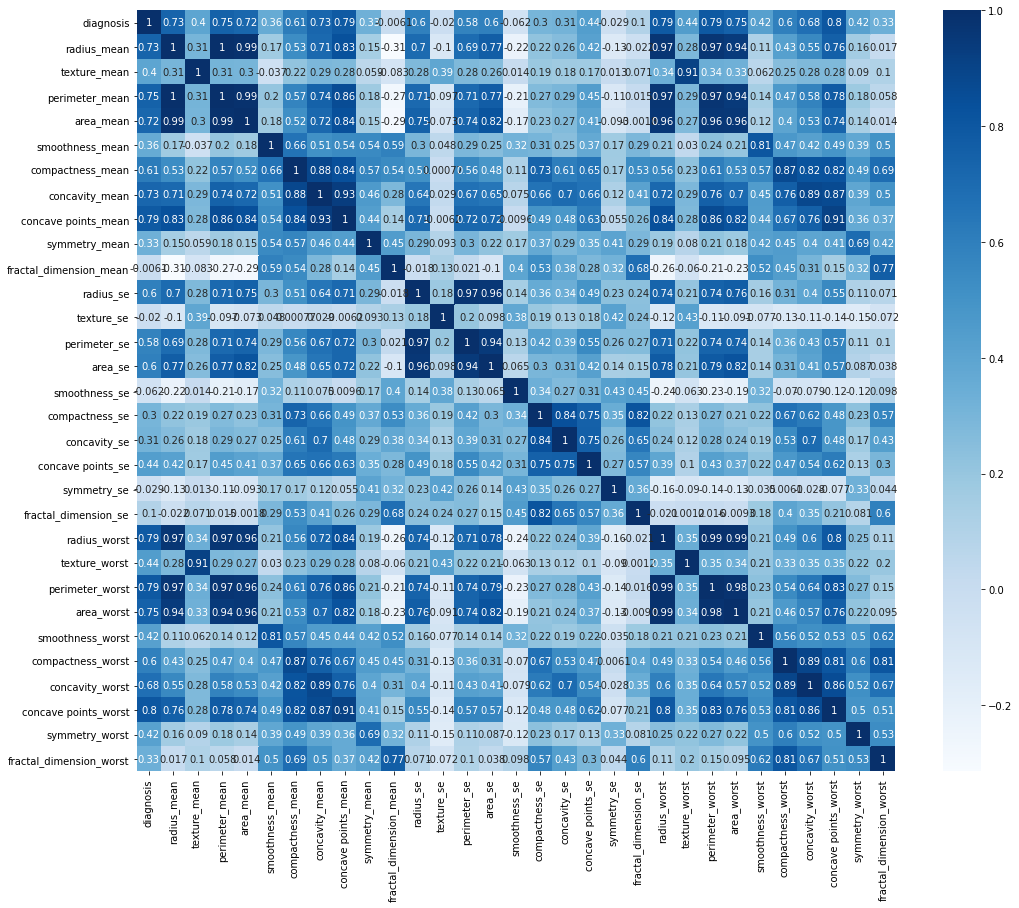

In [27]:
#Using Pearson Correlation(feature selection)
plt.figure(figsize=(17,14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [28]:
#Feature selection
cor_target = abs(cor["diagnosis"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.734240
perimeter_mean          0.746955
area_mean               0.719774
compactness_mean        0.614999
concavity_mean          0.727438
concave points_mean     0.787284
radius_se               0.598410
perimeter_se            0.584127
area_se                 0.596963
radius_worst            0.785365
perimeter_worst         0.791349
area_worst              0.752709
compactness_worst       0.599210
concavity_worst         0.677754
concave points_worst    0.803277
Name: diagnosis, dtype: float64

In [29]:
df = df[relevant_features.index]
df.shape

(529, 16)

In [30]:
df.describe()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.359168,14.074516,91.570397,649.861626,0.103137,0.086280,0.048100,0.396757,2.799221,39.137813,16.209658,106.732250,873.567297,0.251222,0.266911,0.113483
std,0.480211,3.525387,24.261370,348.610384,0.050702,0.076765,0.038515,0.258175,1.876763,40.789478,4.822445,33.362686,559.204014,0.152685,0.202540,0.065111
min,0.000000,6.981000,43.790000,143.500000,0.023440,0.000000,0.000000,0.111500,0.757000,6.802000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000
25%,0.000000,11.640000,74.720000,415.100000,0.065450,0.029160,0.020170,0.232300,1.597000,17.740000,12.970000,83.850000,510.500000,0.147200,0.114400,0.063840
50%,0.000000,13.270000,85.840000,542.900000,0.092280,0.059880,0.032750,0.319700,2.275000,24.190000,14.900000,97.190000,677.300000,0.211700,0.224100,0.098580
75%,1.000000,15.780000,103.800000,782.700000,0.129600,0.120400,0.070380,0.474300,3.271000,44.410000,18.760000,124.900000,1070.000000,0.329900,0.378600,0.160900
max,1.000000,28.110000,188.500000,2499.000000,0.286700,0.426800,0.201200,2.873000,21.980000,525.600000,33.130000,229.300000,3432.000000,1.058000,1.252000,0.291000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 570
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             529 non-null    int64  
 1   radius_mean           529 non-null    float64
 2   perimeter_mean        529 non-null    float64
 3   area_mean             529 non-null    float64
 4   compactness_mean      529 non-null    float64
 5   concavity_mean        529 non-null    float64
 6   concave points_mean   529 non-null    float64
 7   radius_se             529 non-null    float64
 8   perimeter_se          529 non-null    float64
 9   area_se               529 non-null    float64
 10  radius_worst          529 non-null    float64
 11  perimeter_worst       529 non-null    float64
 12  area_worst            529 non-null    float64
 13  compactness_worst     529 non-null    float64
 14  concavity_worst       529 non-null    float64
 15  concave points_worst  5

**Split the dataset into train, validation and test set.**

In [32]:
x = df.iloc[:,1:].values
y = df.iloc[:,0:1].values

In [33]:
#Splitting the data set into Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Use a classifier to predict and diagnose the type of cancer**

In [34]:
#Calling and training the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Performance (Accuracy, Precision and Recall) on test set and confusion matrix analysis.**

In [37]:
#Predicting the results
y_pred = classifier.predict(x_test)

In [38]:
#Accuracy on test set
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test,y_pred)
acc = test_acc * 100
print("Accuracy on test set = %0.3f"%acc)

Accuracy on test set = 95.283


In [39]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[73  1]
 [ 4 28]]


**Error**

In [40]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Squared Error      = ",mse)
print("Root Mean Squared Error = ",rmse)
print("Mean Absolute Error     = ",mae)

Mean Squared Error      =  0.04716981132075472
Root Mean Squared Error =  0.2171861213815347
Mean Absolute Error     =  0.04716981132075472
